In [13]:
import numpy as np
import cv2
import time
import os
import Helpers
import CaptureFrame_Process
import Localization
import plate_rotation
import Recognize
import Segment
from pre_processing_data import read_reference_characters
import character_recognition

In [3]:
# Load Image
path = 'dataset/Frames/Category_I/'
name = 'plate4.jpg'
img = cv2.imread(path+name)

0.4118952751159668


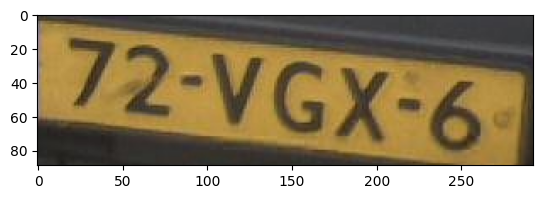

In [4]:
# Localization
start = time.time()
plates = Localization.plate_detection(img)
end = time.time()-start
print(end)
for plate in plates:
    Helpers.plotImage(plate)

0.007136821746826172


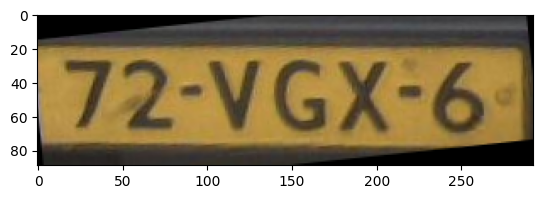

In [5]:
# Rotation
start = time.time()
plate = plates[0]
rotated = plate_rotation.rotation_pipeline(plate)
end = time.time()-start
print(end)
Helpers.plotImage(rotated)

0.002268075942993164


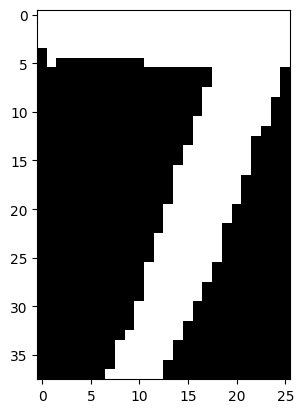

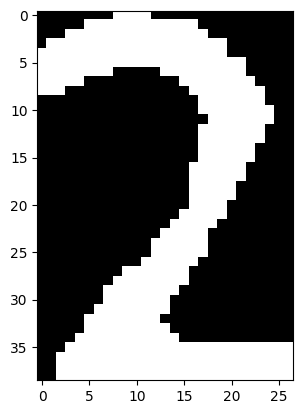

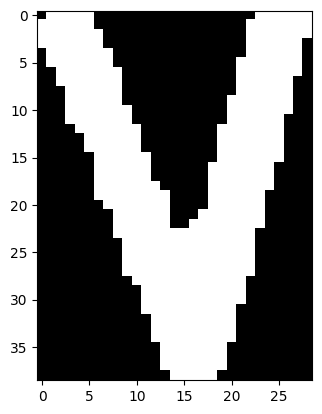

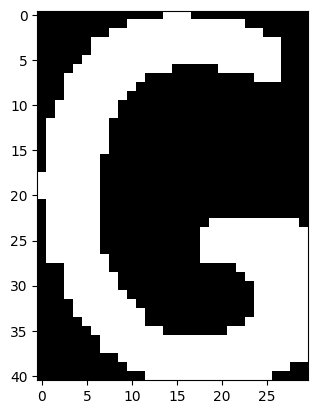

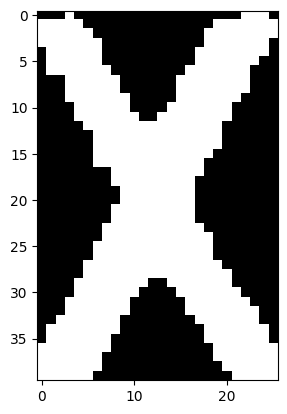

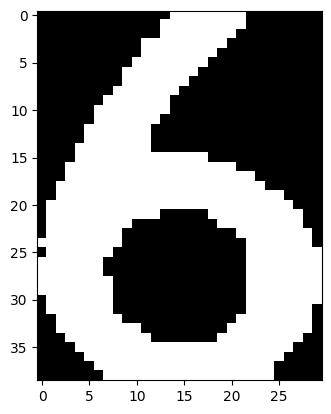

In [8]:
# Segmentation
start = time.time()
chars, dashes = Segment.segment(rotated, show=False)
end = time.time()-start
print(end)
for char in chars:
    Helpers.plotImage(char, cmapType="gray")

0.0010020732879638672


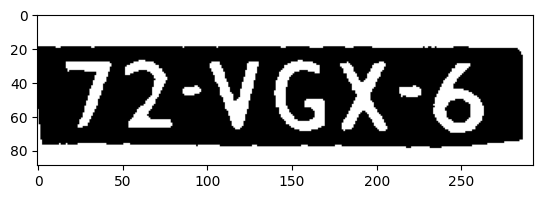

In [11]:
# Thresholding
start = time.time()
gray = cv2.cvtColor(rotated, cv2.COLOR_BGR2GRAY)
binary = Helpers.isodata_thresholding(gray)
end = time.time()-start
print(end)
Helpers.plotImage(binary, cmapType="gray")

0.0010745525360107422


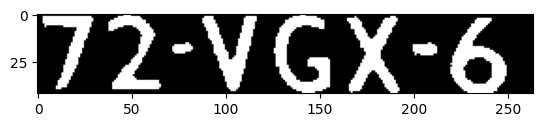

In [12]:
# Clear Top-Bottom
start = time.time()
cleared = Segment.clear_top_bottom(binary)
end = time.time()-start
print(end)
Helpers.plotImage(cleared, cmapType="gray")

In [14]:
# Read reference characters
start = time.time()
reference_characters: list = read_reference_characters('./dataset/Lab07-Dataset')
end = time.time()-start
print(end)

0.03579425811767578


In [15]:
# Recognize
start = time.time()
for char in chars: 
    scores, output = character_recognition.recognise_character(reference_characters, char)
    print(output)
end = time.time()-start
print(end)

7
2
v
g
x
6
0.0304105281829834


0.0182039737701416


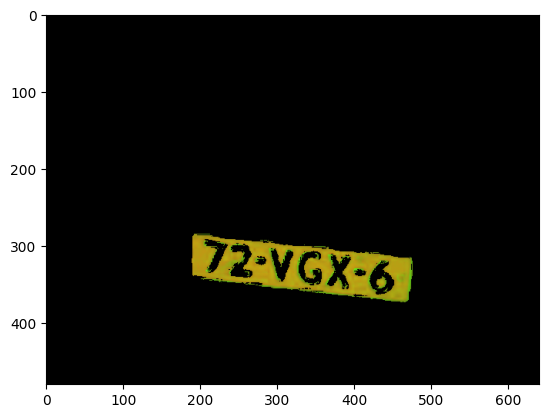

In [16]:
# Mask
start = time.time()
masked_image = Localization.masked_image(img, 13, 28, 136,246,89, 240)
end = time.time()-start
print(end)
Helpers.plotImage(masked_image)

0.42023730278015137


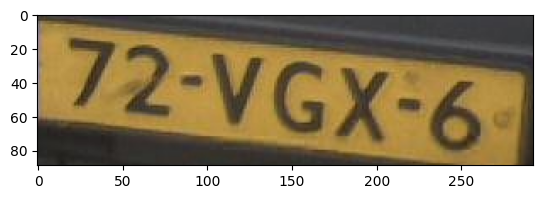

In [17]:
# Crop plates
start = time.time()
plates, boxes = Localization.crop_plates(masked_image, img)
end = time.time()-start
print(end)
for plate in plates:
    Helpers.plotImage(plate)